# Machine Learning and Statistics 2022 Project
<hr style="border-top: 1px solid #001a79;" />
<h1 style="color: #001a79;">Anomaly Detection Using Keras</h1>

<hr style="border-top: 1px solid #001a79;" /> 

This project looks at the Keras time series anomaly detection. Keras is a high level, deep learning Application Programming Interface (API) developed for implementing neural networks. As it is python fronted it is realtively easy to work with. {*1*}
The time series code is taken from here [Keras Time Series](https://keras.io/examples/timeseries/timeseries_anomaly_detection/){*2*} As this code provides limited detail on explaining the code, I will attempt to expand on what is provided to provide a better explanation. 


In [1]:
# Numerical arrays.
import numpy as np

# Spreadsheet-like Data Frames.
import pandas as pd

# Neural networks.
import tensorflow.keras as keras

# layers of neural networks
from tensorflow.keras import layers

# Plotting
import matplotlib.pyplot as plt

Above is the importation of the libaries and packages needed to run the code. 
* Matplolib is a Python 20 plotting library which produces publication quality figures in a variety of hardcopy formats and interactive    enviroments across platforms. 

* NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

* Pandas is an open source, BDS-licenced libary providing high-oerfimance, easy-to-use data structures and data analysis tools. 

* TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of     tasks but has a particular focus on training and inference of deep neural networks.{*3*}





## Data

The data used comes from the links below:

Kaggle - https://www.kaggle.com/datasets/boltzmannbrain/nab

From the Kaggle page "The Numenta Anomaly Benchmark (NAB) is a novel benchmark for evaluating algorithms for anomaly detection in streaming, online applications. It is comprised of over 50 labeled real-world and artificial timeseries data files plus a novel scoring mechanism designed for real-time applications. All of the data and code is fully open-source, with extensive documentation, and a scoreboard of anomaly detection algorithms."
The full dataset is included here: Github - https://github.com/numenta/NAB 


The data set contains 2 CSV files art daily small noise csv file and art daily jumpsup csv file which are read in below using pandas

In [2]:
#Root of URLs.
root_url = 'https://raw.githubusercontent.com/numenta/NAB/master/data/'

#Data file without anomaly.
no_anomaly_url = root_url +'artificialNoAnomaly/art_daily_small_noise.csv'

#Data file with anomaly.
with_anomaly_url = root_url +'artificialWithAnomaly/art_daily_jumpsup.csv'


In [3]:
#Reading in of csv file no anomaly with pandas.
df_small_noise = pd.read_csv(no_anomaly_url, parse_dates=True, index_col="timestamp")

In [4]:
#Reading in of csv file with anomaly with pandas.
df_daily_jumpsup = pd.read_csv(with_anomaly_url, parse_dates=True, index_col="timestamp")

In [5]:
df_small_noise.head()
#This is the displaying of the first five lines of the small noise csv. 

,value
timestamp,
2014-04-01 00:00:00,18.324919
2014-04-01 00:05:00,21.970327
2014-04-01 00:10:00,18.624806
2014-04-01 00:15:00,21.953684
2014-04-01 00:20:00,21.909120


In [6]:
df_daily_jumpsup.head()
#This is the displaying of the first five lines of the jumpsup csv. 

,value
timestamp,
2014-04-01 00:00:00,19.761252
2014-04-01 00:05:00,20.500833
2014-04-01 00:10:00,19.961641
2014-04-01 00:15:00,21.490266
2014-04-01 00:20:00,20.187739


Below Pandas and Pyplot are used to display the data graphyically which makes it easier to see fluctuations.  

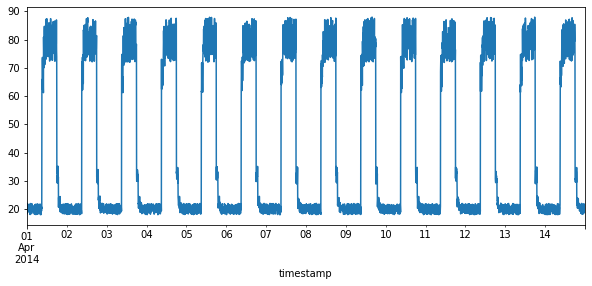

In [7]:
#This creates a plot and includes a figure size
fig, ax = plt.subplots(figsize=(10,4))
#Use pandas to plot data frame.
df_small_noise.plot(legend=False, ax=ax);

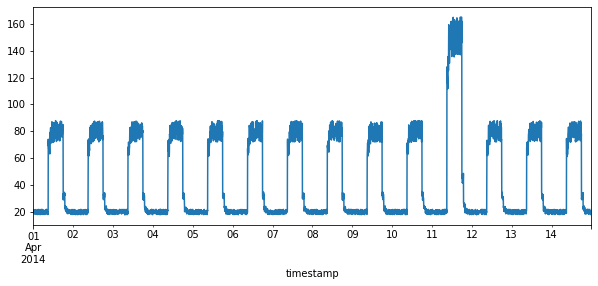

In [8]:
#This creates a plot and includes a figure size
fig, ax = plt.subplots(figsize=(10,4))
#Use pandas to plot data frame.
df_daily_jumpsup.plot(legend=False, ax=ax);

## Preprocessing

In [9]:
#Getting mean of the values in no anomaly data and then dividing by standard deviation
df_train_vals = (df_small_noise - df_small_noise.mean()) / df_small_noise.std()
df_train_vals.head()

,value
timestamp,
2014-04-01 00:00:00,-0.858829
2014-04-01 00:05:00,-0.728993
2014-04-01 00:10:00,-0.848148
2014-04-01 00:15:00,-0.729586
2014-04-01 00:20:00,-0.731173


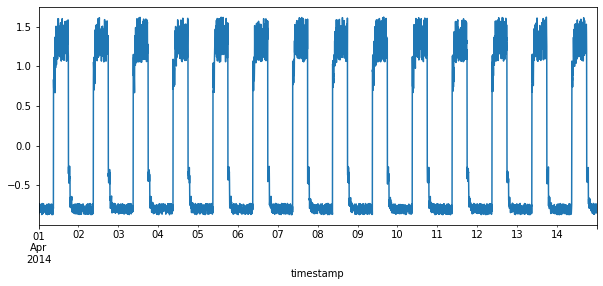

In [10]:
#This creates a plot and includes a figure size
fig,ax = plt.subplots(figsize=(10,4))

#Use pandas to plot data frame.
df_train_vals.plot(legend=False, ax=ax);

In [11]:
#displays the number of training samples
df_train_vals.shape

(4032, 1)

In [12]:
#identifying the name of the columns
df_train_vals.columns


Index(['value'], dtype='object')

Columns are called value

In [13]:
#
window_size = 288

Window example:
```python
[1, 1, 2, 4, 5, 6, 7, 1, 2, 3, 4, 5]
window_size = 3
[1, 1, 2]
[1, 2, 4]
[2, 4, 5]
[4, 5, 6]
```

In [14]:
# Generated training sequences for use in the model.
def windows(vals, N=window_size):
    #start with an empty list
    L = []
    #loop through all the possible windows
    for i in range(len(vals) - N + 1):
    #Append a window to the list
        L.append(vals[i:i + N])
    #stack them on display
    return np.stack(L )

In [15]:
#
x_train = windows(df_train_vals)

In [16]:
#
x_train[0][0], x_train[0][-1]

(array([-0.85882857]), array([-0.79671155]))

In [17]:
#
df_train_vals.iloc[0], df_train_vals.iloc[window_size -1]

(value   -0.858829
 Name: 2014-04-01 00:00:00, dtype: float64,
 value   -0.796712
 Name: 2014-04-01 23:55:00, dtype: float64)

In [18]:
#
x_train.shape

(3745, 288, 1)

From above we have 3745 windows of 288 size each 

In [19]:
#
layers = [
  #
  layers.Input(shape=(x_train.shape[1], x_train.shape[2])),
  #
  layers.Conv1D(
    filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  layers.Dropout(rate=0.2),
  #
  layers.Conv1D(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),
  #
  layers.Conv1DTranspose(
    filters=16, kernel_size=7, padding="same", strides=2, activation="relu"),   
  #
  layers.Dropout(rate=0.2),
  #
  layers.Conv1DTranspose(
        filters=32, kernel_size=7, padding="same", strides=2, activation="relu"),  
  layers.Conv1DTranspose(filters=1, kernel_size=7, padding="same"),
]

In [22]:
#
model = keras.Sequential(layers)
#
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")
# Gives layers and summary of the information.
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 144, 32)           256       
_________________________________________________________________
dropout (Dropout)            (None, 144, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 72, 16)            3600      
_________________________________________________________________
conv1d_transpose (Conv1DTran (None, 144, 16)           1808      
_________________________________________________________________
dropout_1 (Dropout)          (None, 144, 16)           0         
_________________________________________________________________
conv1d_transpose_1 (Conv1DTr (None, 288, 32)           3616      
_________________________________________________________________
conv1d_transpose_2 (Conv1DTr (None, 288, 1)            2

In [23]:
#
history = model.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=128,
    validation_split=0.1,
    callbacks=[
        keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
    ],
)


Epoch 1/50
27/27 [==============================] - 4s 136ms/step - loss: 0.4299 - val_loss: 0.0548
Epoch 2/50
27/27 [==============================] - 3s 101ms/step - loss: 0.0748 - val_loss: 0.0404
Epoch 3/50
27/27 [==============================] - 3s 107ms/step - loss: 0.0577 - val_loss: 0.0361
Epoch 4/50
27/27 [==============================] - 3s 108ms/step - loss: 0.0488 - val_loss: 0.0310
Epoch 5/50
27/27 [==============================] - 3s 104ms/step - loss: 0.0416 - val_loss: 0.0285
Epoch 6/50
27/27 [==============================] - 3s 111ms/step - loss: 0.0368 - val_loss: 0.0278
Epoch 7/50
27/27 [==============================] - 3s 96ms/step - loss: 0.0333 - val_loss: 0.0279
Epoch 8/50
27/27 [==============================] - 3s 102ms/step - loss: 0.0307 - val_loss: 0.0284
Epoch 9/50
27/27 [==============================] - 3s 108ms/step - loss: 0.0284 - val_loss: 0.0280
Epoch 10/50
27/27 [==============================] - 3s 99ms/step - loss: 0.0267 - val_loss: 0.0287
E

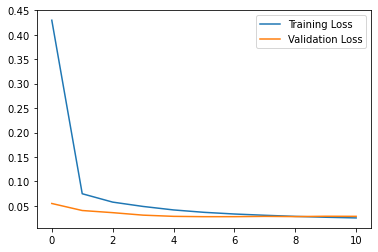

In [24]:

plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()


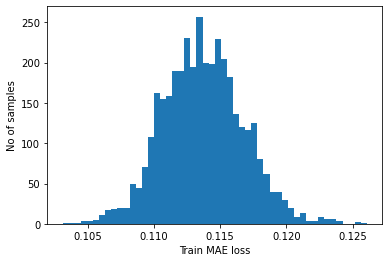

Reconstruction error threshold:  0.1260808857407285


In [25]:
# Get train MAE loss.
x_train_pred = model.predict(x_train)
train_mae_loss = np.mean(np.abs(x_train_pred - x_train), axis=1)

plt.hist(train_mae_loss, bins=50)
plt.xlabel("Train MAE loss")
plt.ylabel("No of samples")
plt.show()

# Get reconstruction loss threshold.
threshold = np.max(train_mae_loss)
print("Reconstruction error threshold: ", threshold)

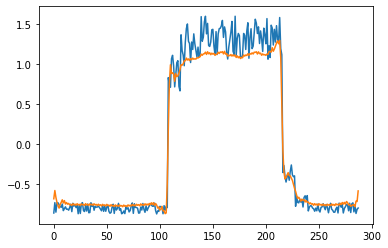

In [26]:

# Checking how the first sequence is learnt
plt.plot(x_train[0])
plt.plot(x_train_pred[0])
plt.show()


In [27]:

df_test_value = (df_daily_jumpsup - training_mean) / training_std
fig, ax = plt.subplots()
df_test_value.plot(legend=False, ax=ax)
plt.show()

# Create sequences from test values.
x_test = create_sequences(df_test_value.values)
print("Test input shape: ", x_test.shape)

# Get test MAE loss.
x_test_pred = model.predict(x_test)
test_mae_loss = np.mean(np.abs(x_test_pred - x_test), axis=1)
test_mae_loss = test_mae_loss.reshape((-1))

plt.hist(test_mae_loss, bins=50)
plt.xlabel("test MAE loss")
plt.ylabel("No of samples")
plt.show()

# Detect all the samples which are anomalies.
anomalies = test_mae_loss > threshold
print("Number of anomaly samples: ", np.sum(anomalies))
print("Indices of anomaly samples: ", np.where(anomalies))

NameError: name 'training_mean' is not defined

In [ ]:
# data i is an anomaly if samples [(i - timesteps + 1) to (i)] are anomalies
anomalous_data_indices = []
for data_idx in range(TIME_STEPS - 1, len(df_test_value) - TIME_STEPS + 1):
    if np.all(anomalies[data_idx - TIME_STEPS + 1 : data_idx]):
        anomalous_data_indices.append(data_idx)


In [ ]:
df_subset = df_daily_jumpsup.iloc[anomalous_data_indices]
fig, ax = plt.subplots()
df_daily_jumpsup.plot(legend=False, ax=ax)
df_subset.plot(legend=False, ax=ax, color="r")
plt.show()

## ***References***
I used ATU video Lectures by Ian McLoughlin and class notes to complete this work.
In addition I searched online using the following websites which were used for the relevant sections of this assessment. 


1. [Simplilearn](https://www.simplilearn.com/tutorials/deep-learning-tutorial/what-is-keras)


2. [Keras Time Series](https://keras.io/examples/timeseries/timeseries_anomaly_detection/)


3. [Tensor Flow](https://en.wikipedia.org/wiki/TensorFlow)



